In [2]:
import pandas as pd
import numpy as np

將所有資料讀入，另外有包括CRM模型的資料

In [3]:
customer_data=pd.read_excel("/Users/tyllersun/Desktop/大一/大數據行銷/信用卡資料.xlsx",sheet_name="客戶資料檔")
print(customer_data.head())
card_data=pd.read_excel("/Users/tyllersun/Desktop/大一/大數據行銷/信用卡資料.xlsx",sheet_name="信用卡資料檔")
trade_data=pd.read_excel("/Users/tyllersun/Desktop/大一/大數據行銷/信用卡資料.xlsx",sheet_name="信用卡交易記錄檔")
trade_data=pd.DataFrame(trade_data)
CRM=pd.read_excel("/Users/tyllersun/Desktop/大一/大數據行銷/CRM.xlsx")

   客戶ID  年齡         生日    居住地 教育程度   性別 婚姻狀況    職業 辦第一張信用卡的時間
0    89  59 1953-09-21  大台北地區   學士  1:男   已婚  白領主管 2003-11-27
1   106  63 1949-10-27  大台北地區   專科  1:男   已婚  白領主管 2003-11-10
2   131  69 1943-11-13  大台北地區   學士  1:男   已婚    其他 2002-11-07
3   179  64 1948-08-02  大台北地區   學士  1:男   已婚  白領主管 2002-09-23
4   261  56 1956-12-01  大台北地區   專科  1:男   已婚   自由業 2003-10-13


In [4]:
CRM.head()

,客戶ID,年齡,生日,居住地,教育程度,性別,婚姻狀況,職業,辦第一張信用卡的時間,last buy,...,monetary point,last buy_rank,last buy point,CRM score,CRM rank,BRP,BFP,BMF,BTS,BTS rank
0,89,59,1953-09-21,大台北地區,學士,1:男,已婚,白領主管,2003-11-27,2012-11-12,...,4,43.5,3,11,42,24,340,5.022700,369,29
1,106,63,1949-10-27,大台北地區,專科,1:男,已婚,白領主管,2003-11-10,2012-11-23,...,3,58.0,3,9,57,24,300,3.006400,327,35
2,131,69,1943-11-13,大台北地區,學士,1:男,已婚,其他,2002-11-07,2011-10-27,...,3,5.0,1,6,78,3,64,2.318600,69,77
3,179,64,1948-08-02,大台北地區,學士,1:男,已婚,白領主管,2002-09-23,2012-02-15,...,1,11.0,1,3,100,6,16,0.306067,22,98
4,261,56,1956-12-01,大台北地區,專科,1:男,已婚,自由業,2003-10-13,2011-12-13,...,2,7.0,1,5,89,3,52,0.660500,55,85


In [5]:
trade_data.head()

,客戶ID,交易序號,信用卡ID,刷卡日期,刷卡產品產業分類,刷卡類型,刷卡金額,刷卡地點,Unnamed: 8,Unnamed: 9,Unnamed: 10,2012-12-01 00:00:00
0,89,29714,14554,2012-11-12,12_量販超市,一般消費,2089,國內,NaN,NaN,NaN,NaN
1,89,28919,8905,2012-10-24,14_旅遊,一般消費,9240,國內,NaN,NaN,NaN,NaN
2,89,28528,14554,2012-10-15,12_量販超市,一般消費,1204,國內,NaN,NaN,NaN,NaN
3,89,26448,14554,2012-08-27,12_量販超市,一般消費,1142,國內,NaN,NaN,NaN,NaN
4,89,25239,14554,2012-07-30,12_量販超市,一般消費,907,國內,NaN,NaN,NaN,NaN


我一樣和CRM model 將每一個客戶的購物比數抓出，並算出每一個個體的購買頻率，平均購買金額及他們的變異數

In [6]:
import statistics as stat
MLE=list()
WMLE=list()
CAI=list()
variance=list()
cash_paid=list()
mean_paid=list()
var_time=list()
mean_time=list()
for i in range(len(trade_data)):
    if i==0 or trade_data["客戶ID"][i]!=trade_data["客戶ID"][i-1]:
        total_time=0
        w_time=0
        count=0
        cash_paid.append(trade_data["刷卡金額"][i])
        time=list()
    if i!=0:
        if  trade_data["客戶ID"][i]==trade_data["客戶ID"][i-1]:
            day=trade_data["刷卡日期"][i-1]-trade_data["刷卡日期"][i]
            day=int(str(day).split(" ")[0])
            time.append(day)
            count=count+1
            total_time=total_time+day
            w_time=w_time+day*count
            cash_paid.append(trade_data["刷卡金額"][i])
            #print(total_time,w_time)
            #print(count,day)
            
        try:
            if trade_data["客戶ID"][i]!=trade_data["客戶ID"][i+1]:
                #print(cash_paid)
                mean_t=stat.mean(time)
                if len(time)>1:
                    var_t=stat.variance(time)
                else:
                    var_t=0
                if ((1+count)*count/2)==0:
                    average_data=0
                    average_w_time=0
                    WML=0
                    cai=0
                    var=0
                    mean=0
                else:
                    average_data=total_time/count
                    average_w_time=w_time/((1+count)*count/2)
                    cai=str(((average_data-average_w_time)/average_data)*100)+"%"
                    #WML=average_data/average_w_time
                    #print(count)
                    mean=stat.mean(cash_paid)
                    if count>1:
                        var=stat.variance(cash_paid)
                    else:
                        var=0
                    cash_paid=list()
                MLE.append(average_data)
                WMLE.append(average_w_time)
                CAI.append(cai)
                variance.append(var)
                mean_paid.append(mean)
                var_time.append(var_t)
                mean_time.append(mean_t)
                #print(time,var_t,mean_t)
                time=list()
                #print(var)
        except:
            if ((1+count)*count/2)==0:
                average_data=0
                average_w_time=0
                WML=0
                cai=0
                var=0
                mean=0
            else:
                average_data=total_time/count
                average_w_time=w_time/((1+count)*count/2)
                cai=str(((average_data-average_w_time)/average_data)*100)+"%"
                #WML=average_data/average_w_time
                #print(count)
                mean=stat.mean(cash_paid)
                if count>1:
                    var=stat.variance(cash_paid)
                else:
                    var=0
                cash_paid=list()
            MLE.append(average_data)
            WMLE.append(average_w_time)
            CAI.append(cai)
            variance.append(var)
            mean_paid.append(mean)
            var_time.append(var_t)
            mean_time.append(mean_t)
            #print(time)
            time=list()
            #print(var)
# for i in range(len(MLE)):
#     print("MLE",MLE[i],"WMLE",WMLE[i],"CAI",CAI[i])
CRM["MLE"]=MLE
CRM["WMLE"]=WMLE
CRM["CAI"]=CAI
CRM["個體購買金額變異數"]=variance
CRM["個體購買金額平均值"]=mean_paid
CRM["個體購買頻率變異數"]=var_time
CRM["個體購買平均頻率"]=mean_time
CRM.head()

,客戶ID,年齡,生日,居住地,教育程度,性別,婚姻狀況,職業,辦第一張信用卡的時間,last buy,...,BMF,BTS,BTS rank,MLE,WMLE,CAI,個體購買金額變異數,個體購買金額平均值,個體購買頻率變異數,個體購買平均頻率
0,89,59,1953-09-21,大台北地區,學士,1:男,已婚,白領主管,2003-11-27,2012-11-12,...,5.022700,369,29,8.321429,7.178711,13.732222502734995%,10540614,1772,60.630379,8.321429
1,106,63,1949-10-27,大台北地區,專科,1:男,已婚,白領主管,2003-11-10,2012-11-23,...,3.006400,327,35,9.648649,10.148829,-5.183940242763774%,6690882,1202,62.066642,9.648649
2,131,69,1943-11-13,大台北地區,學士,1:男,已婚,其他,2002-11-07,2011-10-27,...,2.318600,69,77,21.933333,17.641667,19.56686930091186%,114896837,4347,398.066667,21.933333
3,179,64,1948-08-02,大台北地區,學士,1:男,已婚,白領主管,2002-09-23,2012-02-15,...,0.306067,22,98,147.000000,129.166667,12.131519274376423%,2542939,2295,2923.000000,147.000000
4,261,56,1956-12-01,大台北地區,專科,1:男,已婚,自由業,2003-10-13,2011-12-13,...,0.660500,55,85,29.750000,30.487179,-2.4779142426201193%,1184193,1524,1448.931818,29.750000


In [7]:
CRM.head()

,客戶ID,年齡,生日,居住地,教育程度,性別,婚姻狀況,職業,辦第一張信用卡的時間,last buy,...,BMF,BTS,BTS rank,MLE,WMLE,CAI,個體購買金額變異數,個體購買金額平均值,個體購買頻率變異數,個體購買平均頻率
0,89,59,1953-09-21,大台北地區,學士,1:男,已婚,白領主管,2003-11-27,2012-11-12,...,5.022700,369,29,8.321429,7.178711,13.732222502734995%,10540614,1772,60.630379,8.321429
1,106,63,1949-10-27,大台北地區,專科,1:男,已婚,白領主管,2003-11-10,2012-11-23,...,3.006400,327,35,9.648649,10.148829,-5.183940242763774%,6690882,1202,62.066642,9.648649
2,131,69,1943-11-13,大台北地區,學士,1:男,已婚,其他,2002-11-07,2011-10-27,...,2.318600,69,77,21.933333,17.641667,19.56686930091186%,114896837,4347,398.066667,21.933333
3,179,64,1948-08-02,大台北地區,學士,1:男,已婚,白領主管,2002-09-23,2012-02-15,...,0.306067,22,98,147.000000,129.166667,12.131519274376423%,2542939,2295,2923.000000,147.000000
4,261,56,1956-12-01,大台北地區,專科,1:男,已婚,自由業,2003-10-13,2011-12-13,...,0.660500,55,85,29.750000,30.487179,-2.4779142426201193%,1184193,1524,1448.931818,29.750000


In [8]:
CRM.to_excel("/Users/tyllersun/Desktop/大一/大數據行銷/CAI.xlsx")

In [9]:
#sort by excel
new_CRM=pd.read_excel("/Users/tyllersun/Desktop/大一/大數據行銷/CAI.xlsx")
new_CRM.head()

,客戶ID,年齡,生日,居住地,教育程度,性別,婚姻狀況,職業,辦第一張信用卡的時間,last buy,...,BMF,BTS,BTS rank,MLE,WMLE,CAI,個體購買金額變異數,個體購買金額平均值,個體購買頻率變異數,個體購買平均頻率
0,89,59,1953-09-21,大台北地區,學士,1:男,已婚,白領主管,2003-11-27,2012-11-12,...,5.022700,369,29,8.321429,7.178711,13.732222502734995%,10540614,1772,60.630379,8.321429
1,106,63,1949-10-27,大台北地區,專科,1:男,已婚,白領主管,2003-11-10,2012-11-23,...,3.006400,327,35,9.648649,10.148829,-5.183940242763774%,6690882,1202,62.066642,9.648649
2,131,69,1943-11-13,大台北地區,學士,1:男,已婚,其他,2002-11-07,2011-10-27,...,2.318600,69,77,21.933333,17.641667,19.56686930091186%,114896837,4347,398.066667,21.933333
3,179,64,1948-08-02,大台北地區,學士,1:男,已婚,白領主管,2002-09-23,2012-02-15,...,0.306067,22,98,147.000000,129.166667,12.131519274376423%,2542939,2295,2923.000000,147.000000
4,261,56,1956-12-01,大台北地區,專科,1:男,已婚,自由業,2003-10-13,2011-12-13,...,0.660500,55,85,29.750000,30.487179,-2.4779142426201193%,1184193,1524,1448.931818,29.750000


算出群體的購買頻率、變異數等（在此以年齡進行分群），此外我也發現到用每個年齡層的消費頻率有所差異。

In [10]:
count3=0
count4=0
count5=0
count6=0
count7=0
count_day3=0
count_day4=0
count_day5=0
count_day6=0
count_day7=0
total_purchase3=list()
total_purchase4=list()
total_purchase5=list()
total_purchase6=list()
total_purchase7=list()
total_freq3=list()
total_freq4=list()
total_freq5=list()
total_freq6=list()
total_freq7=list()
for i in range(len(new_CRM)):
    if new_CRM["年齡"][i]<=30:
        count3=count3+1
        count_day3=count_day3+new_CRM["MLE"][i]
        total_purchase3.append(new_CRM["個體購買金額平均值"][i])
        total_freq3.append(new_CRM["個體購買平均頻率"][i])
    elif new_CRM["年齡"][i]<=40:
        count4=count4+1
        count_day4=count_day4+new_CRM["MLE"][i]
        total_purchase4.append(new_CRM["個體購買金額平均值"][i])
        total_freq4.append(new_CRM["個體購買平均頻率"][i])
    elif new_CRM["年齡"][i]<=50:
        count5=count5+1
        count_day5=count_day5+new_CRM["MLE"][i]
        total_purchase5.append(new_CRM["個體購買金額平均值"][i])
        total_freq5.append(new_CRM["個體購買平均頻率"][i])
    elif new_CRM["年齡"][i]<=60:
        count6=count6+1
        count_day6=count_day6+new_CRM["MLE"][i]
        total_purchase6.append(new_CRM["個體購買金額平均值"][i])
        total_freq6.append(new_CRM["個體購買平均頻率"][i])
    else:
        count7=count7+1
        count_day7=count_day7+new_CRM["MLE"][i]
        total_purchase7.append(new_CRM["個體購買金額平均值"][i])
        total_freq7.append(new_CRM["個體購買平均頻率"][i])
avg_day3=count_day3/count3
avg_day4=count_day4/count4
avg_day5=count_day5/count5
avg_day6=count_day6/count6
avg_day7=count_day7/count7
avg_purchase3=stat.mean(total_purchase3)
avg_purchase4=stat.mean(total_purchase4)
avg_purchase5=stat.mean(total_purchase5)
avg_purchase6=stat.mean(total_purchase6)
avg_purchase7=stat.mean(total_purchase7)
var_purchase3=stat.variance(total_purchase3)
var_purchase4=stat.variance(total_purchase4)
var_purchase5=stat.variance(total_purchase5)
var_purchase6=stat.variance(total_purchase6)
var_purchase7=stat.variance(total_purchase7)
avg_freq3=stat.mean(total_freq3)
avg_freq4=stat.mean(total_freq4)
avg_freq5=stat.mean(total_freq5)
avg_freq6=stat.mean(total_freq6)
avg_freq7=stat.mean(total_freq7)
var_freq3=stat.variance(total_freq3)
var_freq4=stat.variance(total_freq4)
var_freq5=stat.variance(total_freq5)
var_freq6=stat.variance(total_freq6)
var_freq7=stat.variance(total_freq7)
age=list()
day=list()
var=list()
avg=list()
count=list()
avg_f=list()
var_f=list()
for i in range(5):
    down=str((i+2)*10)
    up=str((i+3)*10)
    text=down+"~"+up
    age.append(text)
count.append(count3)
count.append(count4)
count.append(count5)
count.append(count6)
count.append(count7)
day.append(avg_day3)
day.append(avg_day4)
day.append(avg_day5)
day.append(avg_day6)
day.append(avg_day7)
var.append(var_purchase3)
var.append(var_purchase4)
var.append(var_purchase5)
var.append(var_purchase6)
var.append(var_purchase7)
avg.append(avg_purchase3)
avg.append(avg_purchase4)
avg.append(avg_purchase5)
avg.append(avg_purchase6)
avg.append(avg_purchase7)
avg_f.append(avg_freq3)
avg_f.append(avg_freq4)
avg_f.append(avg_freq5)
avg_f.append(avg_freq6)
avg_f.append(avg_freq7)
var_f.append(var_freq3)
var_f.append(var_freq4)
var_f.append(var_freq5)
var_f.append(var_freq6)
var_f.append(var_freq7)
print(age)
print(day)
age_list=pd.DataFrame()
age_list["age"]=age
age_list["人數"]=count
#age_list["平均天數"]=day
age_list["平均購買金額"]=avg
age_list["平均購買金額變異數"]=var
age_list["平均購買週期數"]=avg_f
age_list["平均購買週期變異數"]=var_f

age_list

['20~30', '30~40', '40~50', '50~60', '60~70']
[12.455099896206141, 20.32199371088032, 36.60644606678768, 31.33876922704965, 37.55464021002578]


,age,人數,平均購買金額,平均購買金額變異數,平均購買週期數,平均購買週期變異數
0,20~30,12,1446,1281577,12.455100,145.680009
1,30~40,18,2036,2403443,20.050826,587.219249
2,40~50,25,2835,7916836,36.606446,4801.552241
3,50~60,29,2424,4526220,31.599306,1397.059510
4,60~70,16,3140,11428435,37.554640,1526.784859


將每一位顧客分別對應到其應有的族群形質，以邊接下來計算CAI指標

In [11]:
avg=list()
var=list()
mean=list()
people=list()
avg_f=list()
var_f=list()
for i in range(len(CRM)):
    if new_CRM["年齡"][i]<=30:
        avg.append(avg_day3)
        var.append(var_purchase3)
        mean.append(avg_purchase3)
        people.append(count3)
        avg_f.append(avg_freq3)
        var_f.append(var_freq3)
    elif new_CRM["年齡"][i]<=40:
        avg.append(avg_day4)
        var.append(var_purchase4)
        mean.append(avg_purchase4)
        people.append(count4)
        avg_f.append(avg_freq4)
        var_f.append(var_freq4)
    elif new_CRM["年齡"][i]<=50:
        avg.append(avg_day5)
        var.append(var_purchase5)
        mean.append(avg_purchase5)
        people.append(count5)
        avg_f.append(avg_freq5)
        var_f.append(var_freq5)
    elif new_CRM["年齡"][i]<=60:
        avg.append(avg_day6)
        var.append(var_purchase6)
        mean.append(avg_purchase6)
        people.append(count6)
        avg_f.append(avg_freq6)
        var_f.append(var_freq6)
    else:
        avg.append(avg_day7)
        var.append(var_purchase7)
        mean.append(avg_purchase7)
        people.append(count7)
        avg_f.append(avg_freq7)
        var_f.append(var_freq7)
CRM["群體樣本數"]=people
CRM["群體平均購買金額"]=mean
CRM["群體購買金額變異數"]=var
CRM["群體平均週期"]=avg_f
CRM["群體購買週期變異數"]=var_f

In [12]:
CRM.head()

,客戶ID,年齡,生日,居住地,教育程度,性別,婚姻狀況,職業,辦第一張信用卡的時間,last buy,...,CAI,個體購買金額變異數,個體購買金額平均值,個體購買頻率變異數,個體購買平均頻率,群體樣本數,群體平均購買金額,群體購買金額變異數,群體平均週期,群體購買週期變異數
0,89,59,1953-09-21,大台北地區,學士,1:男,已婚,白領主管,2003-11-27,2012-11-12,...,13.732222502734995%,10540614,1772,60.630379,8.321429,29,2424,4526220,31.599306,1397.059510
1,106,63,1949-10-27,大台北地區,專科,1:男,已婚,白領主管,2003-11-10,2012-11-23,...,-5.183940242763774%,6690882,1202,62.066642,9.648649,16,3140,11428435,37.554640,1526.784859
2,131,69,1943-11-13,大台北地區,學士,1:男,已婚,其他,2002-11-07,2011-10-27,...,19.56686930091186%,114896837,4347,398.066667,21.933333,16,3140,11428435,37.554640,1526.784859
3,179,64,1948-08-02,大台北地區,學士,1:男,已婚,白領主管,2002-09-23,2012-02-15,...,12.131519274376423%,2542939,2295,2923.000000,147.000000,16,3140,11428435,37.554640,1526.784859
4,261,56,1956-12-01,大台北地區,專科,1:男,已婚,自由業,2003-10-13,2011-12-13,...,-2.4779142426201193%,1184193,1524,1448.931818,29.750000,29,2424,4526220,31.599306,1397.059510


貝式統計模型
<br>以下利用貝式平均數已讓群體與個體的性質同時存在。
<br>若群體的差異化相較於個體的差異化大，則算出來的平均數會較接近於個體的平均數，反之亦然。
以下也利用善布圖畫出個體平均花費與貝氏平均的圖形。

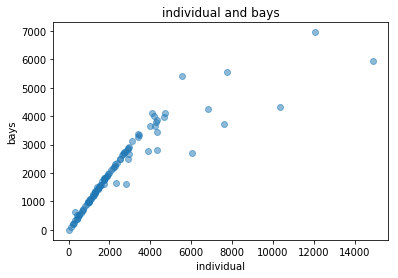

In [16]:
basin=list()
for i in range(len(CRM)):
    r=CRM["群體購買金額變異數"][i]
    k=CRM["個體購買金額變異數"][i]/CRM["群體樣本數"][i]
    x=CRM["個體購買金額平均值"][i]
    o=CRM["群體平均購買金額"][i]
    basin_avg=(r/(r+k))*x+(k/(r+k))*o
    basin.append(basin_avg)
    #print(basin_avg)
CRM["貝氏平均購買金額"]=basin
CRM.head()
import matplotlib.pyplot as plt
plt.scatter(CRM["個體購買金額平均值"], CRM["貝氏平均購買金額"], alpha=.5)
plt.title("individual and bays")
plt.xlabel("individual")
plt.ylabel("bays")
plt.show()

利用貝式平均法算出個體與群體之間的平均數

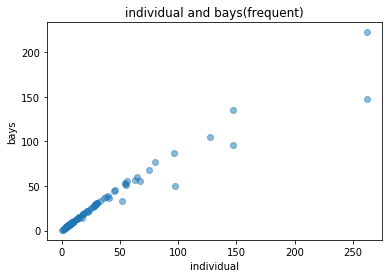

In [17]:
basin=list()
for i in range(len(CRM)):
    r=CRM["群體購買週期變異數"][i]
    k=CRM["個體購買頻率變異數"][i]/CRM["群體樣本數"][i]
    x=CRM["個體購買平均頻率"][i]
    o=CRM["群體平均週期"][i]
    basin_avg=(r/(r+k))*x+(k/(r+k))*o
    basin.append(basin_avg)
    #print(basin_avg)
CRM["貝氏平均購買頻率"]=basin
CRM.head()
import matplotlib.pyplot as plt
plt.scatter(CRM["個體購買平均頻率"], CRM["貝氏平均購買頻率"], alpha=.5)
plt.title("individual and bays(frequent)")
plt.xlabel("individual")
plt.ylabel("bays")
plt.show()

In [126]:
CRI=list()
for i in range(len(CRM)):
    #print(i)
    MLE=CRM["個體購買平均頻率"][i]
    HBE=CRM["貝氏平均購買頻率"][i]
    GE=CRM["群體平均週期"][i]
    a=((MLE-HBE)/(MLE-GE))*100
    #print(a)
    #print(i,a)
    CRI.append(a)
#print(CRI)

CRM["CRI"]=CRI
CRM

,客戶ID,年齡,生日,居住地,教育程度,性別,婚姻狀況,職業,辦第一張信用卡的時間,last buy,...,群體樣本數,貝氏平均購買金額,個體購買金額變異數,個體購買頻率變異數,個體購買平均頻率,群體購買金額變異數,群體平均週期,群體購買週期變異數,貝氏平均購買頻率,CRI
0,89,59,1953-09-21,大台北地區,學士,1:男,已婚,白領主管,2003-11-27,2012-11-12,...,29,1820.606938,10540614,60.630379,8.321429,4526220,31.599306,1397.059510,8.356212,0.149427
1,106,63,1949-10-27,大台北地區,專科,1:男,已婚,白領主管,2003-11-10,2012-11-23,...,16,1263.289430,6690882,62.066642,9.648649,11428435,37.554640,1526.784859,9.719371,0.253430
2,131,69,1943-11-13,大台北地區,學士,1:男,已婚,其他,2002-11-07,2011-10-27,...,16,3913.318188,114896837,398.066667,21.933333,11428435,37.554640,1526.784859,22.183803,1.603386
3,179,64,1948-08-02,大台北地區,學士,1:男,已婚,白領主管,2002-09-23,2012-02-15,...,16,2305.359536,2542939,2923.000000,147.000000,11428435,37.554640,1526.784859,135.303818,10.686777
4,261,56,1956-12-01,大台北地區,專科,1:男,已婚,自由業,2003-10-13,2011-12-13,...,29,1532.072059,1184193,1448.931818,29.750000,4526220,31.599306,1397.059510,29.813853,3.452825
5,605,46,1966-06-04,大台北地區,高中,1:男,已婚,藍領(勞動工作或作業員)一般職員,2003-02-07,2012-11-28,...,25,99.250057,244456,2.264912,0.763103,7916836,36.606446,4801.552241,0.763779,0.001887
6,773,45,1967-11-23,大台北地區,學士,1:男,已婚,白領一般職員,2003-11-21,2012-11-21,...,25,2171.119565,2516686,492.660000,28.080000,7916836,36.606446,4801.552241,28.114851,0.408740
7,861,41,1971-01-22,大台北地區,學士,1:男,已婚,白領主管,2002-12-03,2012-10-15,...,25,7043.041111,244887660,160.969697,7.636364,7916836,36.606446,4801.552241,7.675160,0.133918
8,867,47,1965-10-28,大台北地區,高中,1:男,已婚,白領主管,2002-10-11,2012-11-19,...,25,2723.956929,42541074,5266.335165,45.214286,7916836,36.606446,4801.552241,44.852515,4.202809
9,920,39,1973-05-29,大台北地區,學士,1:男,已婚,自營事業老闆,2010-03-05,2012-11-13,...,18,2502.879360,39640494,19.417645,5.966102,2403443,20.050826,587.219249,5.991929,0.183369


算出個職業之間CRI的關係

In [26]:
CRI=list()
for i in range(len(CRM)):
    #print(i)
    MLE=CRM["個體購買平均頻率"][i]
    HBE=CRM["貝氏平均購買頻率"][i]
    GE=CRM["群體平均週期"][i]
    a=((MLE-HBE)/(MLE-GE))*100
    #print(a)
    #print(i,a)
    CRI.append(a)
#print(CRI)

CRM["CRI"]=CRI
sort_CRM=CRM.sort_values(by=["CRI","貝氏平均購買金額"],ascending=False)
sort_CRM
sort_CRM.groupby("職業")
a=sort_CRM.groupby("職業")["CRI"].sum()/sort_CRM.groupby("職業")["客戶ID"].count()
a.to_excel("/Users/tyllersun/Desktop/大一/大數據行銷/sort_CRM.xlsx")
a

職業
一般服務從業人員            5.465141
公務員                 6.199685
其他                  1.603386
專業(技術)人員            0.005330
白領一般職員              6.984514
白領主管                5.087012
自營事業老闆              4.567375
自由業                 9.547869
藍領(勞動工作或作業員)一般職員    9.390634
藍領(工廠及製造業)主管        0.636727
軍警                  2.571201
農漁民                 1.492409
退休或無業               3.019048
dtype: float64

In [25]:
CRM.to_excel("/Users/tyllersun/Desktop/大一/大數據行銷/CAI.xlsx")